In [ ]:
import pandas as pd
import SnowDepth.data_loader as DL
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Inspect data. Also includes an inspection of FF algos at the end

In [19]:
# Path to TIFF files
data_dir = "data/tif_files"

# Load dataframe (valid pixels only)
df = DL.build_df(str(data_dir), drop_invalid=True, upper_threshold=3)

# Count pixels per AOI
counts = df["aoi_name"].value_counts().reset_index()
counts.columns = ["AOI", "Pixel_count"]
valid_pixels = counts["Pixel_count"].sum()

print("\nPixel count per AOI:")
print(counts.to_string(index=False))
print(f"\nTotal valid pixels (SD ≤ 3 m): {valid_pixels:,}")

# Build other DataFrames for comparison
df_with_invalid = DL.build_df(str(data_dir), drop_invalid=False, upper_threshold=3)
df_without_threshold = DL.build_df(str(data_dir), drop_invalid=True, upper_threshold=None)

total_pixels = len(df_with_invalid)
no_threshold_pixels = len(df_without_threshold)

# Calculate pixel counts
invalid_pixels = total_pixels - len(df_without_threshold)
above_threshold = no_threshold_pixels - valid_pixels

print(f"\nTotal pixels (including invalid): {total_pixels:,}")
print(f"Pixels dropped (invalid or negative SD): {invalid_pixels:,}")
print(f"Pixels with SD > 3 m removed: {above_threshold:,}")



Pixel count per AOI:
  AOI  Pixel_count
ID_BS      1655811
CO_FR       619199
ID_DC       376009
ID_MC       344460
UT_LC       260994
CO_CP       206902

Total valid pixels (SD ≤ 3 m): 3,463,375

Total pixels (including invalid): 5,945,438
Pixels dropped (invalid or negative SD): 2,450,938
Pixels with SD > 3 m removed: 31,125


In [20]:
# Check descriptive statistics
pd.set_option('display.float_format', '{:.2f}'.format)
numeric_feats = [c for c in df.columns if c not in ('aoi_name','row','col')]

# Describe first 12
print("\nDescriptive Statistics:")
first_11 = numeric_feats[:10]
print(df[first_11].describe().drop(index='count'))


Descriptive Statistics:
      Sigma_VH  Sigma_VV  Gamma_VH  Gamma_VV  Beta_VH  Beta_VV  Gamma_VH_RTC  \
mean    -17.31    -10.66    -16.12     -9.47   -15.43    -8.78        -17.04   
std       3.66      4.62      3.64      4.59     3.70     4.67          2.77   
min     -48.96    -38.03    -50.05    -36.27   -49.55   -35.78       -120.00   
25%     -19.58    -13.53    -18.37    -12.31   -17.73   -11.68        -18.04   
50%     -17.27    -11.32    -16.06    -10.10   -15.42    -9.47        -16.73   
75%     -15.04     -8.42    -13.85     -7.23   -13.15    -6.53        -15.65   
max      12.03     20.68     12.85     21.49    14.54    23.21         11.51   

      Gamma_VV_RTC  Sigma_sum  Gamma_sum  
mean        -10.41       0.26       0.33  
std           2.98       1.34       1.62  
min        -120.00       0.00       0.00  
25%         -11.59       0.06       0.07  
50%         -10.40       0.09       0.12  
75%          -9.29       0.18       0.23  
max          20.09     117.57    

In [21]:
# Describe next 10
print("\nDescriptive Statistics:")
next_10 = numeric_feats[10:20]
print(df[next_10].describe().drop(index='count'))


Descriptive Statistics:
      Beta_sum  Gamma_RTC_sum  Sigma_diff  Gamma_diff  Beta_diff  \
mean      0.43           0.14       -0.20       -0.26      -0.34   
std       2.38           0.26        1.28        1.55       2.27   
min       0.00           0.00     -116.10     -139.96    -207.87   
25%       0.09           0.09       -0.11       -0.15      -0.17   
50%       0.14           0.11       -0.05       -0.07      -0.08   
75%       0.27           0.14       -0.03       -0.04      -0.05   
max     210.52         102.25       13.31       16.09      23.71   

      Gamma_RTC_diff  Sigma_ratio  Gamma_ratio  Beta_ratio  Gamma_RTC_ratio  
mean           -0.09        -6.65        -6.65       -6.65            -6.63  
std             0.25         2.28         2.28        2.28             2.21  
min          -101.75       -31.71       -34.13      -34.13           -37.63  
25%            -0.09        -7.65        -7.65       -7.65            -7.66  
50%            -0.07        -6.41       

In [22]:
# Describe last
print("\nDescriptive Statistics:")
last = numeric_feats[20:]
print(df[last].describe().drop(index='count'))


Descriptive Statistics:
        LIA  IAFE  Elevation  Slope  sin_Aspect  cos_Aspect  Veg_Heigth   SD
mean  43.23 40.48    2425.45  20.29        0.04        0.08        3.62 1.34
std   15.11  2.16     542.86  10.44        0.74        0.67        3.87 0.52
min    0.03 33.31    1144.45   0.00       -1.00       -1.00        0.01 0.00
25%   32.73 40.92    2117.07  12.37       -0.74       -0.52        0.50 0.97
50%   44.10 41.23    2359.32  20.17        0.10        0.13        2.51 1.34
75%   54.01 41.48    2851.19  28.09        0.80        0.72        5.41 1.68
max  114.86 42.44    3812.94  75.10        1.00        1.00       44.29 3.00


As we can see, there some SD values that are negative, and the max SD indicates some outliers

In [23]:
# Check for missing values
print("\nMissing Values per Column:")
print(df.isna().sum())


Missing Values per Column:
aoi_name             0
row                  0
col                  0
Sigma_VH             0
Sigma_VV             0
Gamma_VH             0
Gamma_VV             0
Beta_VH              0
Beta_VV              0
Gamma_VH_RTC         0
Gamma_VV_RTC         0
Sigma_sum            0
Gamma_sum            0
Beta_sum             0
Gamma_RTC_sum        0
Sigma_diff           0
Gamma_diff           0
Beta_diff            0
Gamma_RTC_diff       0
Sigma_ratio          0
Gamma_ratio          0
Beta_ratio           0
Gamma_RTC_ratio      0
LIA                  0
IAFE                 0
Elevation            0
Slope                0
sin_Aspect           0
cos_Aspect           0
Veg_Heigth         669
SD                   0
dtype: int64


In [24]:
# Check that filtering nan, negative and SD > 3m works (This is false SD values)
nan_rows = df['SD'].isna().sum()
print(f"NaN SD values: {nan_rows}")

negative_rows = len(df[(df['SD'] < 0)])
print(f"Negative SD values: {negative_rows}")

outlier_rows = len(df[(df['SD'] > 3)])
print(f"SD values above 3 m: {outlier_rows}")

NaN SD values: 0
Negative SD values: 0
SD values above 3 m: 0


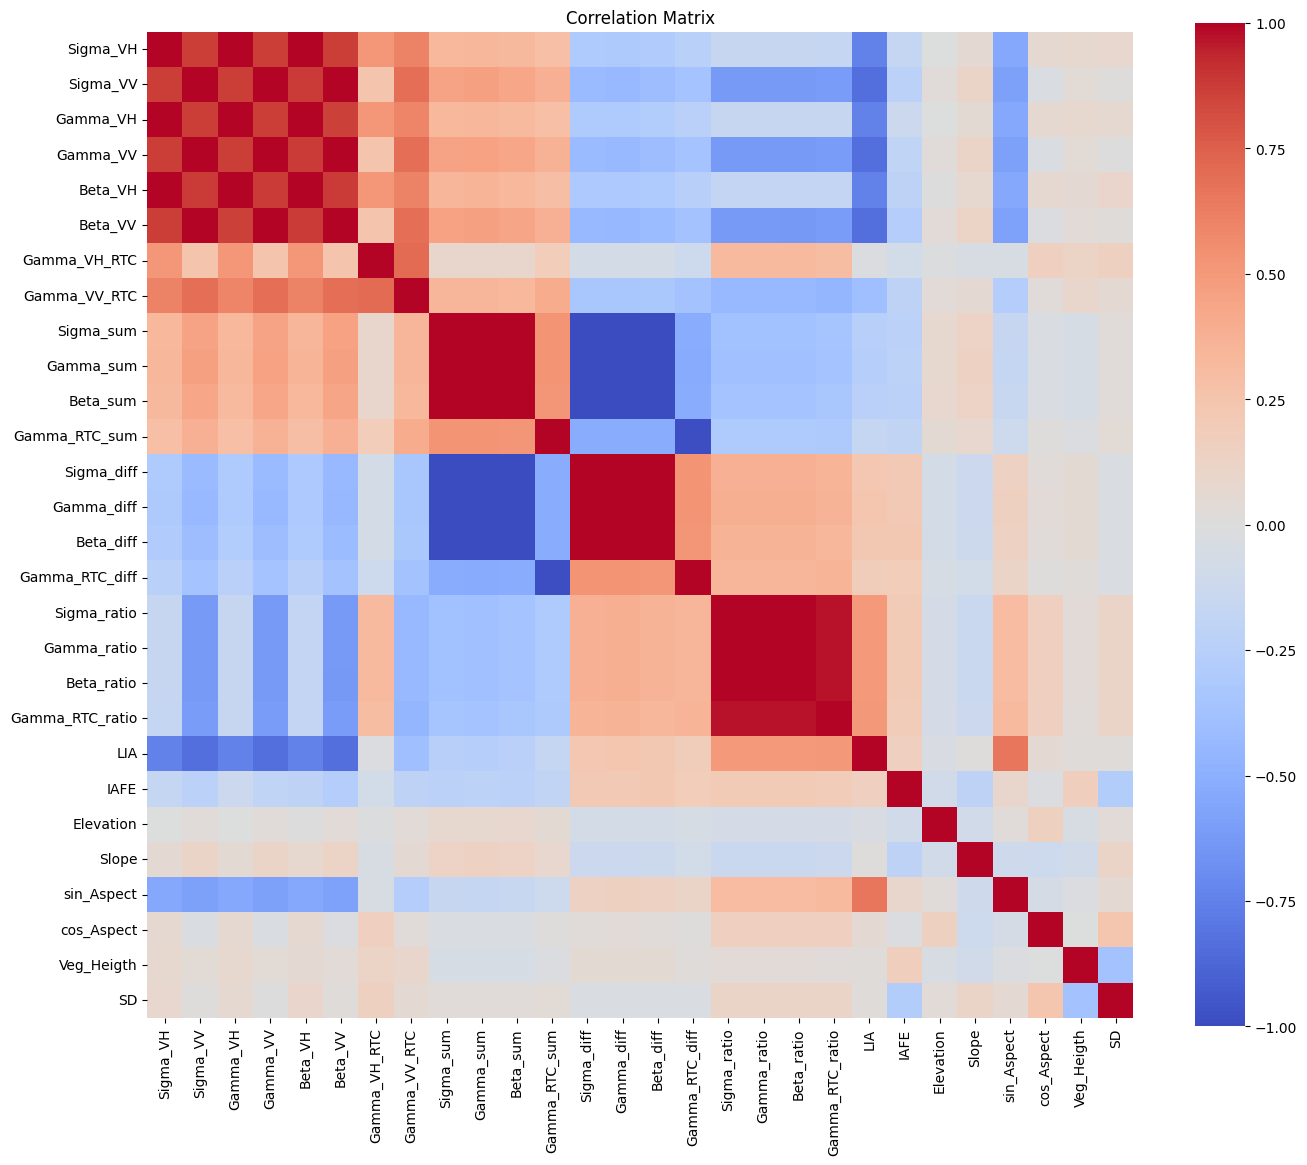

In [25]:
# Plot Correlation Matrix
variables = [c for c in df.select_dtypes(include=[np.number]).columns
             if c not in ('row','col')]

X = df[variables].replace([np.inf, -np.inf], np.nan)
corr = X.corr()

plt.figure(figsize=(max(8, 0.5*len(variables)), max(6, 0.5*len(variables))))
sns.heatmap(corr, annot=len(variables)<=15, fmt='.2f',
            cmap='coolwarm', vmin=-1, vmax=1, square=True,
            cbar_kws={'shrink': .75})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



In [ ]:
# Inspection of FF algorithms output

from pathlib import Path
import sys
# Set ROOT path to access other directories in project
ROOT = Path.cwd().parent
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))
import SnowDepth.optimal_features as OF
from SnowDepth.config import HOLDOUT_AOI

dev_df  = df[df['aoi_name'] != HOLDOUT_AOI].copy()

